In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy  import  stats
import warnings
warnings.filterwarnings('ignore')

In [4]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

In [5]:
titanic=sns.load_dataset('titanic')

In [6]:
print("\n DATASET SHAPE")
print(f" Rows:{titanic.shape[0]}")
print(f" colummns:{titanic.shape[1]}")


 DATASET SHAPE
 Rows:891
 colummns:15


In [7]:
print("\n COLUMN  INFORMATION")
titanic.info()


 COLUMN  INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
print("\n FIRST 5  ROWS")
titanic.head()


 FIRST 5  ROWS


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
print("\n STATISTICAL SUMMARY")
titanic.describe()


 STATISTICAL SUMMARY


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
print("\n STATISTICAL SUMMARY((INCLUDING CATAGORICAL)")
titanic.describe(include='all')


 STATISTICAL SUMMARY((INCLUDING CATAGORICAL)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# missing value

In [11]:
# Print missing values count
print("\n missing values")
missing_values=titanic.isnull().sum()


 missing values


In [12]:
missing_percent=100*titanic.isnull().sum()/len(titanic)

In [13]:
# Create a DataFrame for missing values
missing_table = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percent
})

In [14]:
# Filter and sort the missing values table
missing_table = missing_table[missing_table['Missing Count'] > 0].sort_values('Missing Count', ascending=False)


In [15]:
# Display the missing values table
missing_table

,Missing Count,Missing Percentage
deck,688,77.216611
age,177,19.865320
embarked,2,0.224467
embark_town,2,0.224467


# visualize missing  values

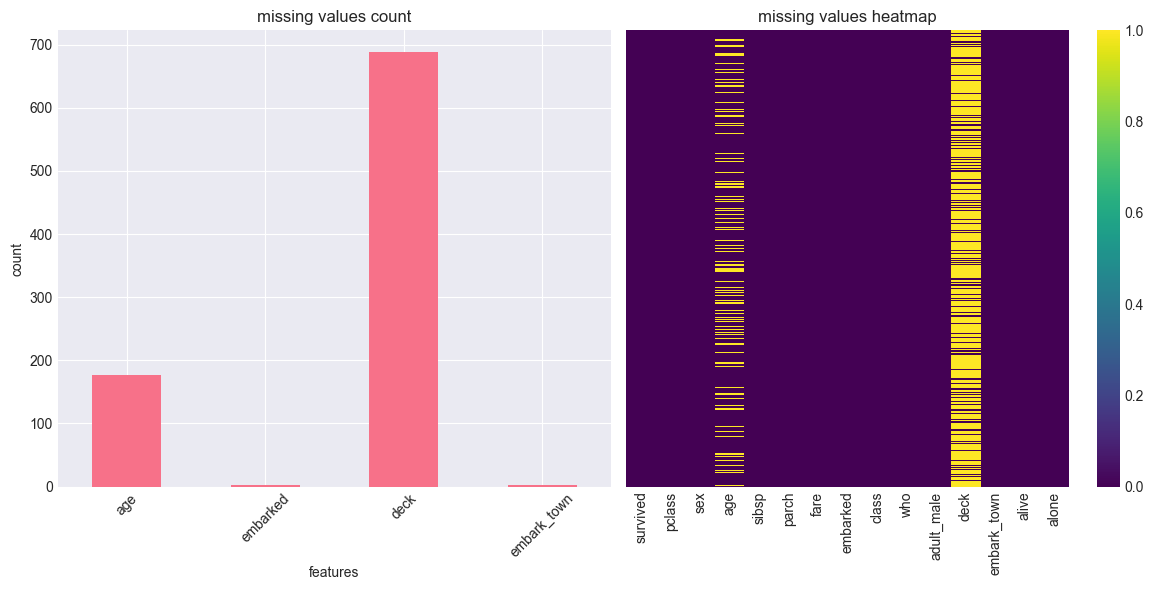

In [16]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
missing_data=titanic.isnull().sum()[titanic.isnull().sum()>0]

# bar plot code
missing_data.plot(kind='bar')
plt.title('missing values count')
plt.xlabel('features')
plt.ylabel('count')
plt.xticks(rotation=45)

#  Heat map code
plt.subplot(1,2,2)
msno_matrix=titanic.isnull().astype(int)
sns.heatmap(msno_matrix,cbar=True,yticklabels=False,cmap='viridis')
plt.title('missing values heatmap')
plt.tight_layout()
plt.show()

# Target variable analysis

In [17]:
print("/n  TARGET VARIABLE(SURVIVED)  DISTRIBUTION:")
survival_counts=titanic['survived'].value_counts()
print(survival_counts)
print(f"survival rate:{titanic['survived'].mean():2%}")

/n  TARGET VARIABLE(SURVIVED)  DISTRIBUTION:
survived
0    549
1    342
Name: count, dtype: int64
survival rate:38.383838%


#  visualize survival distribution

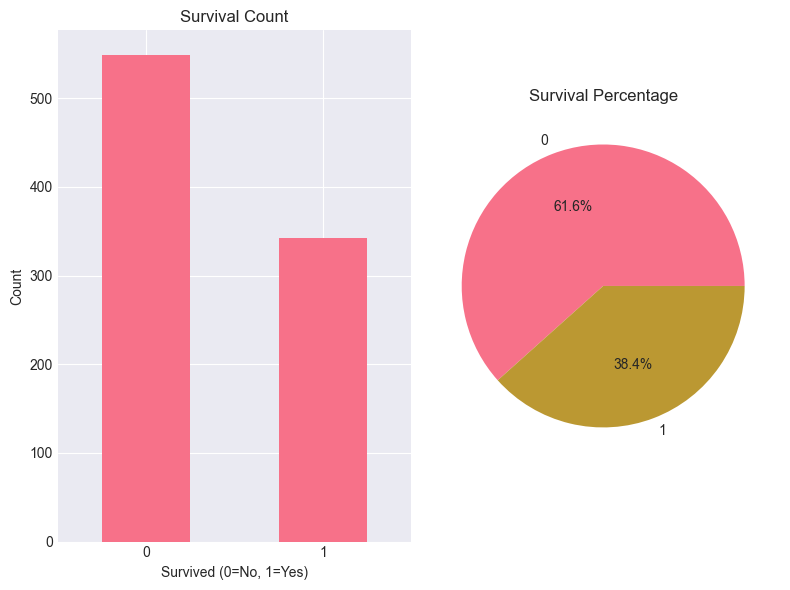

In [18]:
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
survival_counts.plot(kind='bar')
plt.title('Survival Count')
plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)


plt.subplot(1, 2, 2)
survival_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Survival Percentage')
plt.ylabel('')
plt.tight_layout()
plt.show()

# numerical feature analysis

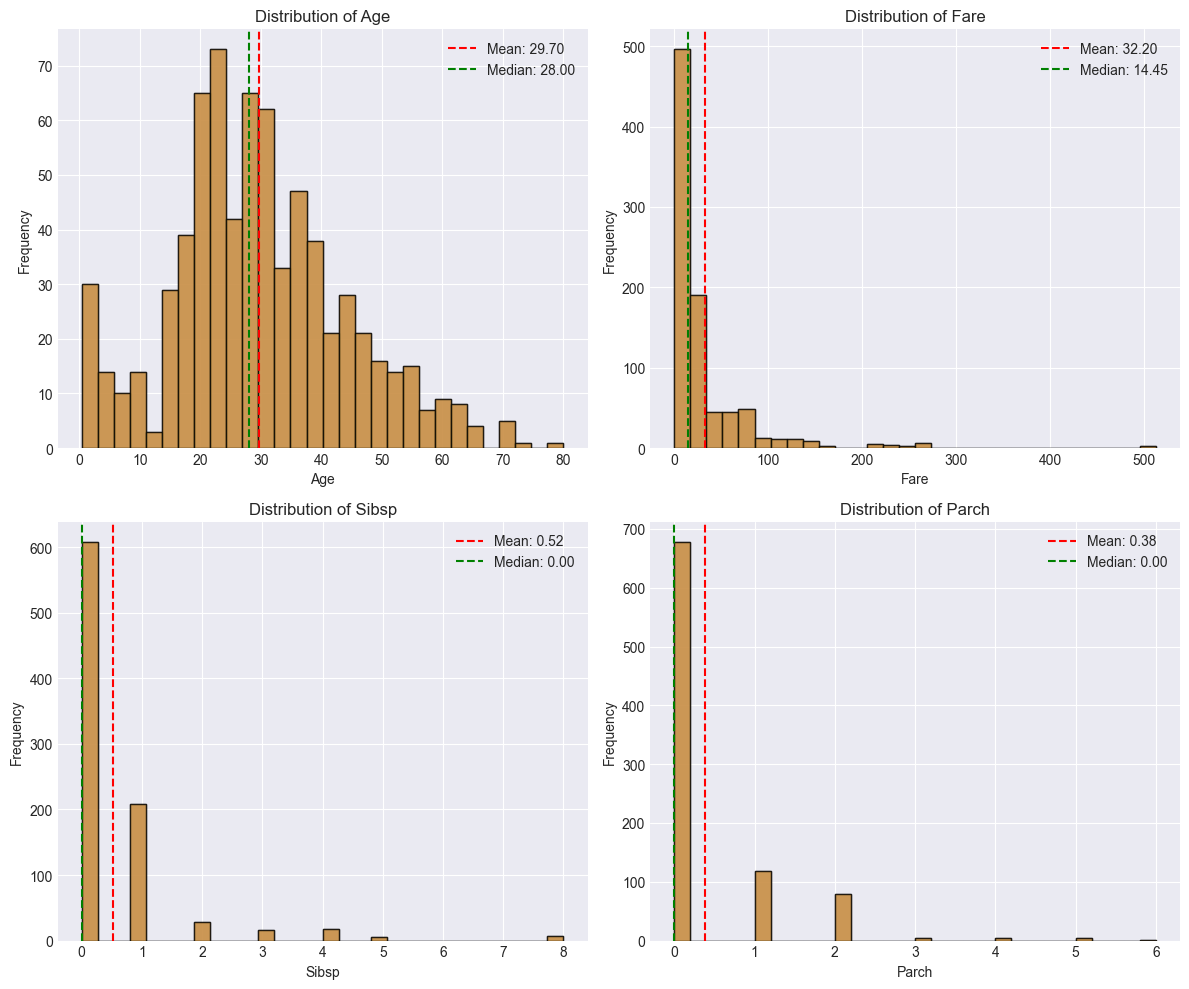

In [19]:
numerical_features=['age', 'fare', 'sibsp', 'parch']

# Distribution plots for numerical features
fig, axes= plt.subplots(2, 2, figsize=(12,10))
axes=axes.ravel()


for idx, feature in enumerate(numerical_features):
   axes[idx].hist(titanic[feature].dropna(),bins=30, edgecolor='black',alpha=0.7)
   axes[idx].set_title(f'Distribution of {feature.capitalize()}')
   axes[idx].set_xlabel(feature.capitalize())
   axes[idx].set_ylabel('Frequency')

for idx, feature in enumerate(numerical_features):
    axes[idx].hist(titanic[feature].dropna(), bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {feature.capitalize()}')
    axes[idx].set_xlabel(feature.capitalize())
    axes[idx].set_ylabel('Frequency')

    mean_val = titanic[feature].mean()
    median_val = titanic[feature].median()

    axes[idx].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')
    axes[idx].legend()

plt.tight_layout()
plt.show()

# box  plots to check for outliers

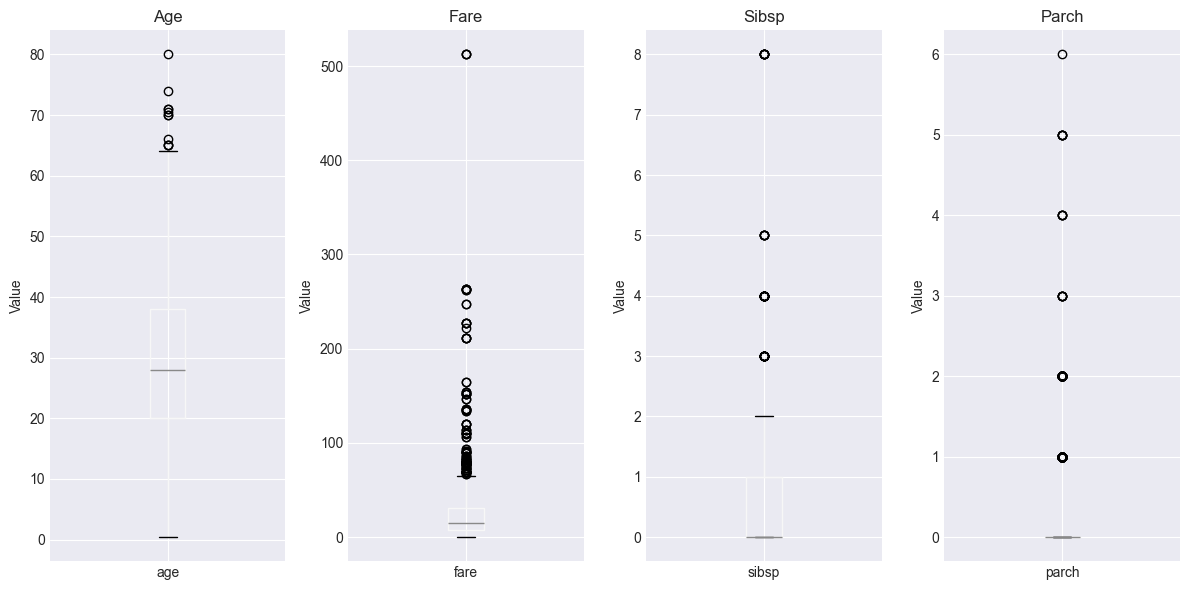

In [20]:
plt.figure(figsize=(12,6))
for idx,feature in enumerate (numerical_features):
      plt.subplot(1,4,idx+1)
      titanic.boxplot(column=feature)
      plt.title(f'{feature.capitalize()}')
      plt.ylabel('Value')
plt.tight_layout()
plt.show()

#  catagorical features  analysis

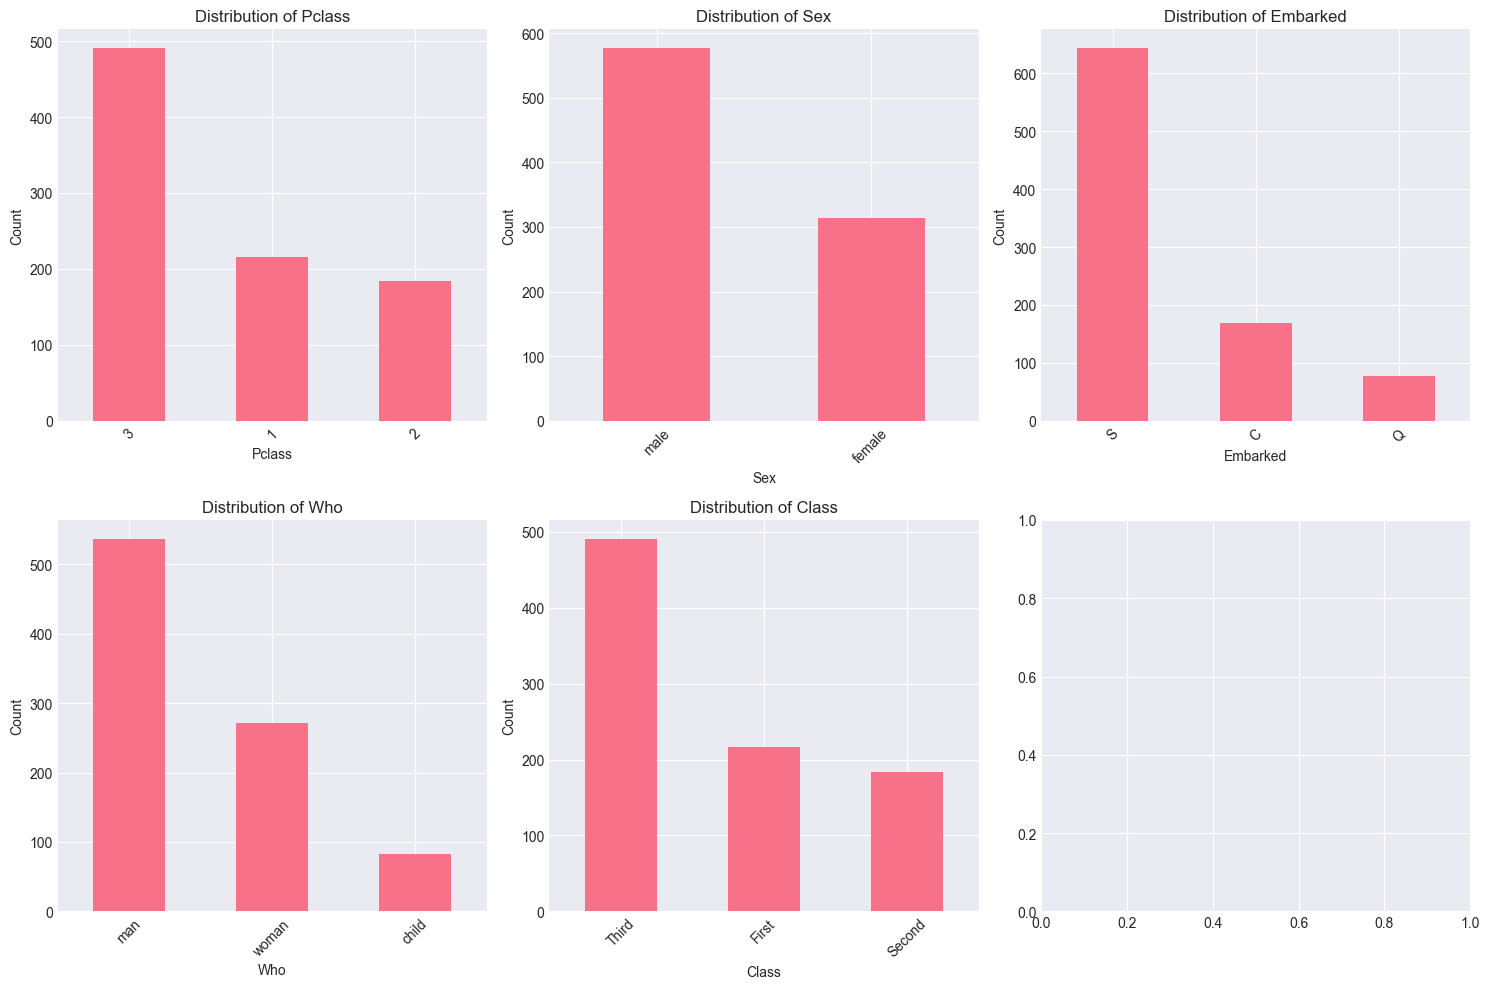

In [21]:
categorical_features = ['pclass', 'sex', 'embarked', 'who', 'class']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, feature in enumerate(categorical_features):
    if idx < len(axes):
        titanic[feature].value_counts().plot(kind='bar', ax=axes[idx])
        axes[idx].set_title(f'Distribution of {feature.capitalize()}')
        axes[idx].set_xlabel(feature.capitalize())
        axes[idx].set_ylabel('Count')
        axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# BIVARIATE ANALYSIS- FEATURES Vs SURVIVAL

***NUMERICAL FEATURES Vs SURVIVAL***

In [22]:
numerical_features=['age','fare','sibsp','parch']


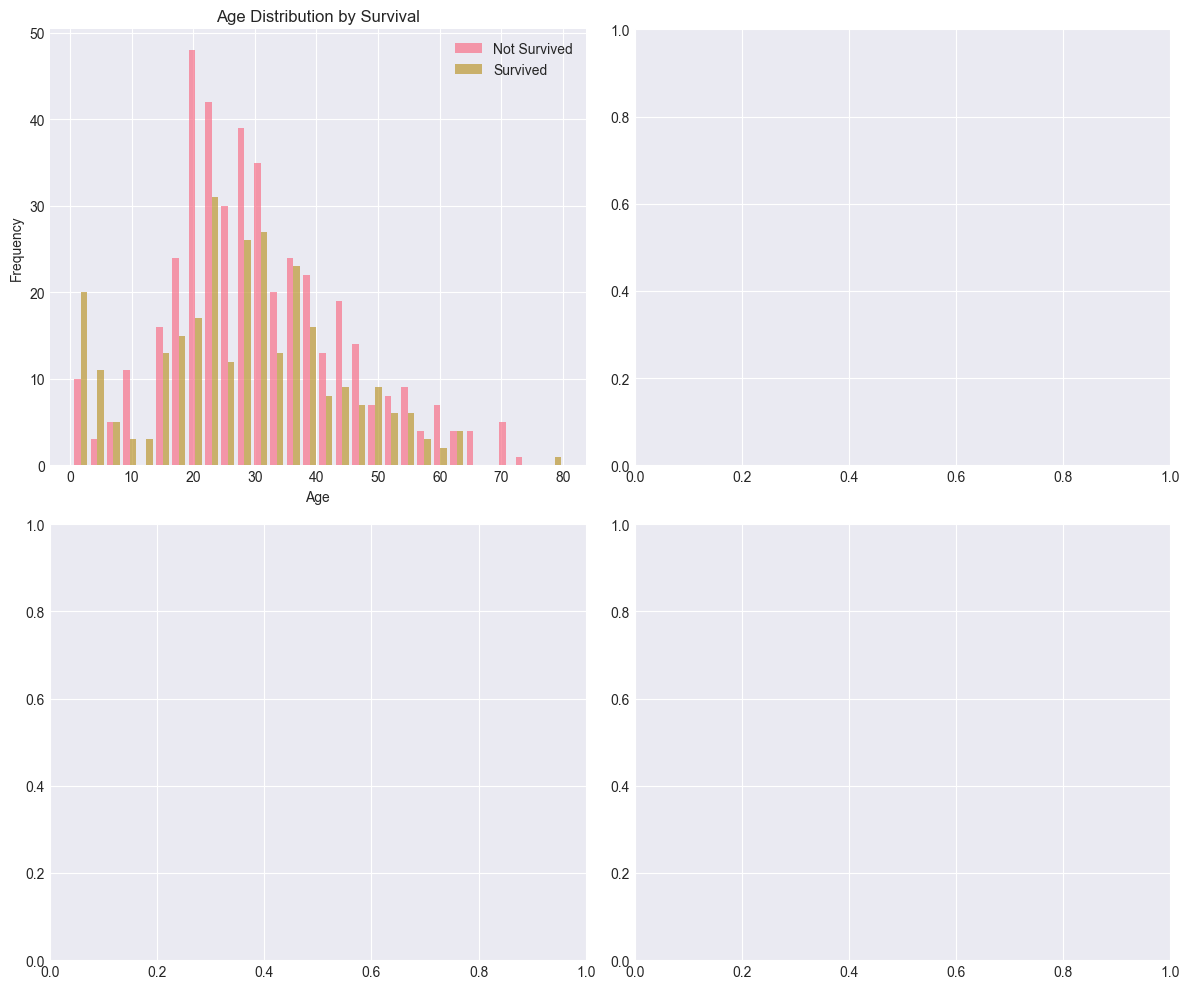

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [28]:
fig,axes=plt.subplots(2,2,figsize=(12,10))
axes=axes.ravel()


for idx, feature in enumerate(numerical_features):
    survived_0 = titanic[titanic['survived'] == 0][feature].dropna()
    survived_1 = titanic[titanic['survived'] == 1][feature].dropna()
    axes[idx].hist([survived_0, survived_1], bins=30, label=['Not Survived', 'Survived'], alpha=0.7)
    axes[idx].set_title(f'{feature.capitalize()} Distribution by Survival')
    axes[idx].set_xlabel(feature.capitalize())
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()
    plt.tight_layout()
    plt.show()